In [14]:
pip install gensim pandas nltk


In [15]:
import pandas as pd
import re
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

In [16]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
file_path = "/content/products.csv"

In [18]:
data = pd.read_csv(file_path)

In [19]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
    _unit_id  relevance  relevance:variance  \
0  711158459       3.67               0.471   
1  711158460       4.00               0.000   
2  711158461       4.00               0.000   
3  711158462       3.67               0.471   
4  711158463       3.33               0.471   

                                       product_image  \
0  http://thumbs2.ebaystatic.com/d/l225/m/mzvzEUI...   
1  http://thumbs3.ebaystatic.com/d/l225/m/mJNDmSy...   
2  http://thumbs4.ebaystatic.com/d/l225/m/m10NZXA...   
3  http://thumbs2.ebaystatic.com/d/l225/m/mZZXTmA...   
4  http://thumbs3.ebaystatic.com/d/l225/m/mzvzEUI...   

                                        product_link  \
0  http://www.ebay.com/itm/Sony-PlayStation-4-PS4...   
1  http://www.ebay.com/itm/Sony-PlayStation-4-Lat...   
2  http://www.ebay.com/itm/Sony-PlayStation-4-PS4...   
3  http://www.ebay.com/itm/Sony-PlayStation-4-500...   
4  http://www.ebay.com/itm/Sony-PlayStation-4-PS4...   

                   product

In [20]:
def preprocess_text(text):
    """
    Function to clean and tokenize text data.
    """
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", str(text))
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

In [21]:
print(data.columns)

Index(['_unit_id', 'relevance', 'relevance:variance', 'product_image',
       'product_link', 'product_price', 'product_title', 'query', 'rank',
       'source', 'url', 'product_description', 'category'],
      dtype='object')


In [23]:
# Extract the relevant column
text_data = data['product_description'].dropna().tolist()



In [24]:
tokenized_text = [str(sentence).lower().split() for sentence in text_data]

In [25]:
model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

In [26]:
print("\nSample vocabulary:")
print(list(model.wv.index_to_key)[:10])


Sample vocabulary:
['the', 'and', 'a', 'to', 'with', 'of', 'for', 'is', 'in', 'this']


In [32]:
from sklearn.decomposition import PCA
vocab = list(model.wv.index_to_key)[:50]
word_vectors = model.wv[vocab]
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

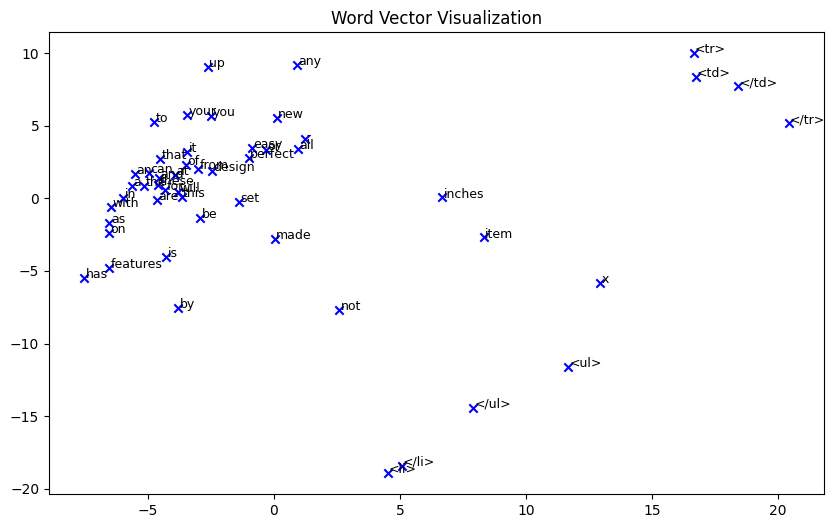

In [36]:
import matplotlib.pyplot as plt

# Ensure reduced_vectors and vocab are already defined
# Assuming reduced_vectors is the result of PCA and vocab contains the words

plt.figure(figsize=(10, 6))

# Loop through the words and their corresponding reduced vectors
for i, word in enumerate(vocab):
    # Plot the word's reduced vector as a scatter point
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], marker='x', color='blue')

    # Annotate the plot with the word
    plt.text(reduced_vectors[i, 0] + 0.05, reduced_vectors[i, 1], word, fontsize=9)

# Add title to the plot
plt.title("Word Vector Visualization")

# Show the plot
plt.show()
